In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

In [22]:
data = pd.read_csv("Employee-Attrition.csv")

In [23]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
clean_data = data[['Age', 'Attrition','Department','DistanceFromHome', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender','HourlyRate','JobInvolvement','JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [27]:
clean_data.head(15)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,2,Female,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,3,Male,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,Male,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,1,Male,40,3,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Research & Development,2,2,Life Sciences,4,Male,79,3,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Research & Development,3,3,Medical,3,Female,81,4,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Research & Development,24,1,Life Sciences,4,Male,67,3,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Research & Development,23,3,Life Sciences,4,Male,44,2,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Research & Development,27,3,Medical,3,Male,94,3,...,2,80,2,17,3,2,7,7,7,7


In [28]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [29]:
clean_data["Attrition"]= clean_data["Attrition"].astype(str)

In [30]:
clean_data.Attrition = clean_data.Attrition.apply(str)


In [31]:
clean_data.dtypes

Age                          int64
Attrition                   object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

(array([588.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 882.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

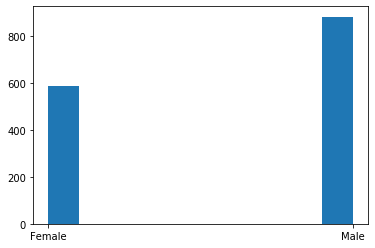

In [32]:
plt.hist(clean_data["Gender"])


In [33]:
grouped = clean_data[clean_data.Attrition == "Yes"].groupby(["Department","Gender"]).count()
grouped

Age  Attrition  DistanceFromHome  Education  \
Department             Gender                                                
Human Resources        Female    6          6                 6          6   
                       Male      6          6                 6          6   
Research & Development Female   43         43                43         43   
                       Male     90         90                90         90   
Sales                  Female   38         38                38         38   
                       Male     54         54                54         54   

                               EducationField  EnvironmentSatisfaction  \
Department             Gender                                            
Human Resources        Female               6                        6   
                       Male                 6                        6   
Research & Development Female              43                       43   
                       Male                90                       90   
Sales                  Female              38                       38   
                       Male                54                       54   

                               HourlyRate  JobInvolvement  JobRole  \
Department             Gender                                        
Human Resources        Female           6               6        6   
                       Male             6               6        6   
Research & Development Female          43              43       43   
                       Male            90              90       90   
Sales                  Female          38              38       38   
                       Male            54              54       54   

                               JobSatisfaction  ...  RelationshipSatisfaction  \
Department             Gender                   ...                             
Human Resources        Female                6  ...                         6   
                       Male                  6  ...                         6   
Research & Development Female               43  ...                        43   
                       Male                 90  ...                        90   
Sales                  Female               38  ...                        38   
                       Male                 54  ...                        54   

                               StandardHours  StockOptionLevel  \
Department             Gender                                    
Human Resources        Female              6                 6   
                       Male                6                 6   
Research & Development Female             43                43   
                       Male               90                90   
Sales                  Female             38                38   
                       Male               54                54   

                               TotalWorkingYears  TrainingTimesLastYear  \
Department             Gender                                             
Human Resources        Female                  6                      6   
                       Male                    6                      6   
Research & Development Female                 43                     43   
                       Male                   90                     90   
Sales                  Female                 38                     38   
                       Male                   54                     54   

                               WorkLifeBalance  YearsAtCompany  \
Department             Gender                                    
Human Resources        Female                6               6   
                       Male                  6               6   
Research & Development Female               43              43   
                       Male                 90              90   
Sales                  Female               38              38   
           

In [34]:
ages =pd.DataFrame(data = clean_data,columns=['Age'] )

bins = [18, 25, 40, 55, 70]
labels = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers']
ages['Generation'] = pd.cut(ages.Age, bins, labels = labels,include_lowest = True)
print(ages)

Age  Generation
0      41       Gen X
1      49       Gen X
2      37  Millenials
3      33  Millenials
4      27  Millenials
...   ...         ...
1465   36  Millenials
1466   39  Millenials
1467   27  Millenials
1468   49       Gen X
1469   34  Millenials

[1470 rows x 2 columns]


In [35]:
result = pd.concat([clean_data,ages.Generation],axis=1,sort=False)
result

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
0,41,Yes,Sales,1,2,Life Sciences,2,Female,94,3,...,80,0,8,0,1,6,4,0,5,Gen X
1,49,No,Research & Development,8,1,Life Sciences,3,Male,61,2,...,80,1,10,3,3,10,7,1,7,Gen X
2,37,Yes,Research & Development,2,2,Other,4,Male,92,2,...,80,0,7,3,3,0,0,0,0,Millenials
3,33,No,Research & Development,3,4,Life Sciences,4,Female,56,3,...,80,0,8,3,3,8,7,3,0,Millenials
4,27,No,Research & Development,2,1,Medical,1,Male,40,3,...,80,1,6,3,3,2,2,2,2,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,Male,41,4,...,80,1,17,3,3,5,2,0,3,Millenials
1466,39,No,Research & Development,6,1,Medical,4,Male,42,2,...,80,1,9,5,3,7,7,1,7,Millenials
1467,27,No,Research & Development,4,3,Life Sciences,2,Male,87,4,...,80,1,6,0,3,6,2,0,3,Millenials
1468,49,No,Sales,2,3,Medical,4,Male,63,2,...,80,0,17,3,2,9,6,0,8,Gen X


In [36]:
min_value = result.MonthlyIncome.min()

In [37]:
max_value = result.MonthlyIncome.max()

In [38]:
max_value

19999

In [42]:
group_gen = result.groupby(['Generation']).agg({'MonthlyIncome':[np.min,np.max]})
group_gen.to_numpy()

array([[ 1009,  8639],
       [ 1052, 19833],
       [ 2011, 19999],
       [ 2066, 19943]], dtype=int64)

In [46]:
data_plus = result.groupby(['Generation'])

for key, item in data_plus:
    print(data_plus.get_group(key), "\n\n")

        ...   
1448                      5                3              5   
1452                      3                3              6   
1454                      3                3              5   
1461                      3                3              3   
1468                      3                2              9   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
18                     8                        3                     7   
25                    13                        4                     8   
27                     7                        4                     2   
...                  ...                      ...                   ...   
1448                   4                        0                     4   
1452                   3                        0                    

In [47]:
data_plus.describe()

Age                                                     \
              count       mean       std   min   25%   50%   75%   max   
Generation                                                               
Gen Z         123.0  22.406504  2.213363  18.0  21.0  23.0  24.0  25.0   
Millenials    882.0  33.146259  4.035896  26.0  30.0  33.0  36.0  40.0   
Gen X         418.0  46.825359  4.296072  41.0  43.0  46.0  50.0  55.0   
Baby Boomers   47.0  57.744681  1.374742  56.0  56.0  58.0  59.0  60.0   

             DistanceFromHome            ... YearsSinceLastPromotion        \
                        count      mean  ...                     75%   max   
Generation                               ...                                 
Gen Z                   123.0  9.268293  ...                     1.0   5.0   
Millenials              882.0  9.117914  ...                     2.0  15.0   
Gen X                   418.0  9.325359  ...                     4.0  15.0   
Baby Boomers             47.0  9.212766  ...                     4.5  15.0   

             YearsWithCurrManager                                           \
                            count      mean       std  min  25%  50%   75%   
Generation                                                                   
Gen Z                       123.0  1.495935  1.467539  0.0  0.0  2.0  2.00   
Millenials                  882.0  4.137188  3.366794  0.0  2.0  3.0  7.00   
Gen X                       418.0  4.873206  4.021012  0.0  2.0  4.0  7.75   
Baby Boomers                 47.0  4.063830  3.691378  0.0  1.5  3.0  7.50   

                    
               max  
Generation          
Gen Z          7.0  
Millenials    17.0  
Gen X         17.0  
Baby Boomers  14.0  

[4 rows x 160 columns]

In [57]:
trace = go.Bar(
   x = result.Generation,
   y = result.MonthlyIncome)

go.Figure(data=[trace])

In [74]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(result, x="Age", y="MonthlyIncome",
	         size="MonthlyIncome", color="Generation", log_x=True, size_max=20)
fig.show()

In [77]:
result.to_csv('plotly.csv')